# Five Assumptions

## 1. Normality of Error Term

Linear Regression, or Ordinary Least Squares (OLS) implicitly assumes a normal distribution in the data.

To be exact, we expect a normal distribution **in the regression error term**.

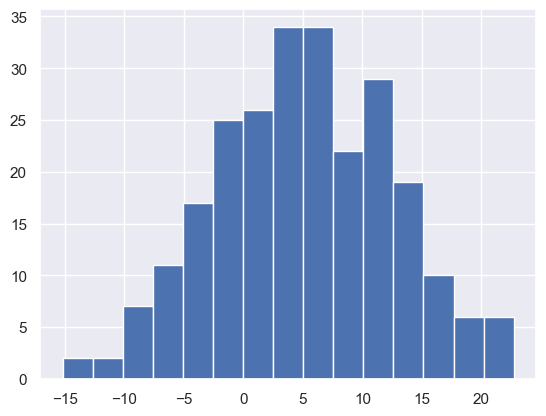

(array([ 4.,  4.,  7., 13., 18., 34., 36., 37., 28., 29., 17., 10., 11.,
         1.,  1.]),
 array([-11.21303046,  -9.66944139,  -8.12585233,  -6.58226327,
         -5.0386742 ,  -3.49508514,  -1.95149608,  -0.40790702,
          1.13568205,   2.67927111,   4.22286017,   5.76644924,
          7.3100383 ,   8.85362736,  10.39721643,  11.94080549]),
 <BarContainer object of 15 artists>)

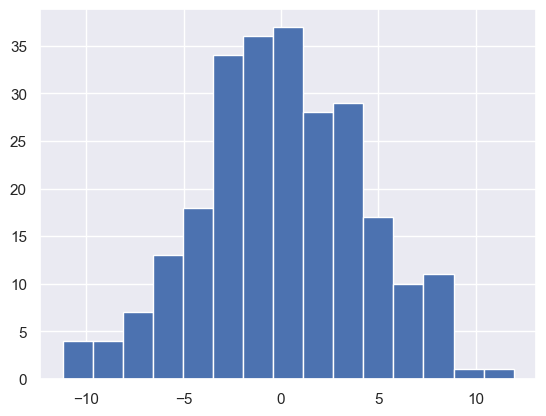

In [1]:
# normality of Error Term
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
sns.set()
rng = np.random.RandomState(1)

X = 10 * rng.rand(250)
y = 2 * X - 5 + (4 * rng.randn(250))
plt.hist(y, bins=15)
plt.show()

est = sm.OLS(y, sm.add_constant(X)).fit()
plt.hist(est.resid,bins=15)


Here this is easily satisfied.

Even with less-than-normal $y$ data, the regression model can normalize it if there are many features:

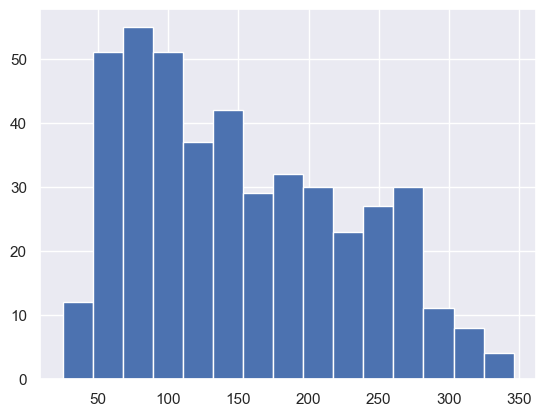

(array([ 4.,  4.,  7., 13., 18., 34., 36., 37., 28., 29., 17., 10., 11.,
         1.,  1.]),
 array([-11.21303046,  -9.66944139,  -8.12585233,  -6.58226327,
         -5.0386742 ,  -3.49508514,  -1.95149608,  -0.40790702,
          1.13568205,   2.67927111,   4.22286017,   5.76644924,
          7.3100383 ,   8.85362736,  10.39721643,  11.94080549]),
 <BarContainer object of 15 artists>)

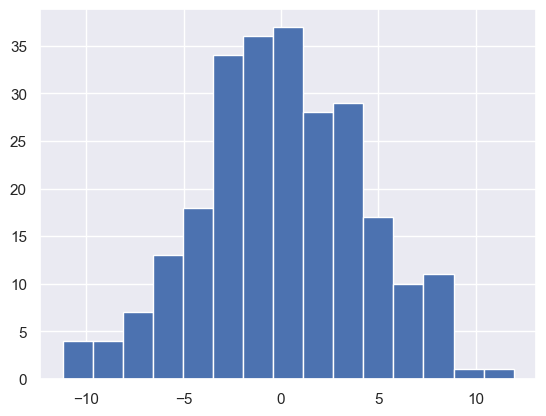

In [2]:
# normality of Error Term continued

from sklearn.datasets import load_diabetes

diabetes = pd.DataFrame(load_diabetes().data,columns=load_diabetes().feature_names)
y = load_diabetes().target

plt.hist(y,bins=15)
plt.show()

X  = sm.add_constant(diabetes)
sm.OLS(y,X).fit().summary()
plt.hist(est.resid,bins=15)

# Note that normality of errors is a condition of severity rather than absolutes.
# Even published research often has non-normal OLS estimates when it's not too severe a problem.
# We'll see non-ordinary models that explicitly deal with this, in another lecture

## 2. Linear Independence

No two variables should be a linear combination of each other.

Otherwise, the $X$ matrix does not have **full [column rank](https://en.wikipedia.org/wiki/Rank_(linear_algebra)#Main_definitions)** and its square can't be inverted for the normal equation to hold:

In [3]:
# linear independence
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
sns.set()
rng = np.random.RandomState(1)


X = 10 * rng.rand(250)
X = sm.add_constant(X)
X = np.concatenate([X,(3*X[:,1]+4)[:,np.newaxis]],axis=1)

y = 2 * X[:, 1] - 5 + (4 * rng.randn(250))

est = sm.OLS(y,X).fit()
est.summary()

# Note error #2 here which has some scary wording.
# We can also see this to some extent in the very extreme values in the inverse matrix:

# While it's possible to compute the matrix because of **floating point errors** (it's not EXACTLY singular)
# we're so close to having a singular matrix that the inverse is dominated by extreme values (almost zero or huge numbers).

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     556.6
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           2.54e-65
Time:                        20:47:46   Log-Likelihood:                -712.07
No. Observations:                 250   AIC:                             1428.
Df Residuals:                     248   BIC:                             1435.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9171      0.231    -12.639      0.000      -3.372      -2.463
x1             3.7060      0.285     13.012      0.000       3.145       4.267
x2            -0.5505      0.070     -7.881      0.000      -0.688      -0.413
==============================================================================
Omnibus:                        0.249   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.883   Jarque-Bera (JB):                0.333
Skew:                          -0.071   Prob(JB):                        0.847
Kurtosis:                       2.892   Cond. No.                     3.52e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.65e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""



### Multicollinearity

**Multicollinearity** is just a regression term for feature correlation.

Having linear dependence means *perfect multicollinearity* (since linear combinations of vectors have correlation = 1).

That said, collinear features **do not bias coefficients** but however they do **reduce efficiency** (eg. artificially increase the coefficient variance)


## 3. Homoscedasticity

Homoscedasticity means **constant variance**.

The evil twin brother is *heteroscedasticity* (HSK) which means **sample-dependent variance**.

This doesn't affect the coefficient value, but do **invalidate the p-values** and coefficient standard errors.

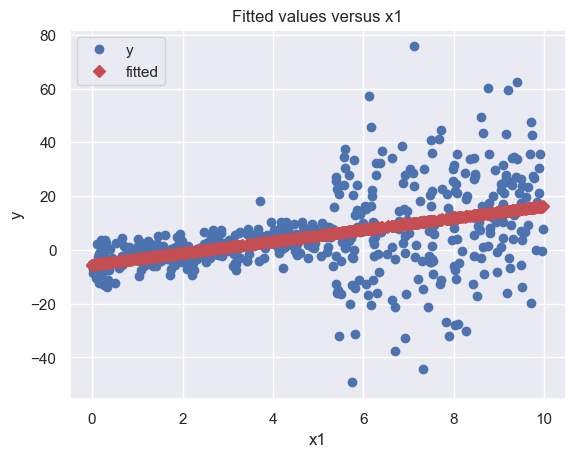

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     106.4
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           9.87e-23
Time:                        20:47:46   Log-Likelihood:                -2026.9
No. Observations:                 500   AIC:                             4058.
Df Residuals:                     498   BIC:                             4066.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.5358      1.240     -4.465      0.000      -7.972      -3.100
x1             2.1728      0.211     10.313      0.000       1.759       2.587
==============================================================================
Omnibus:                       44.559   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.420
Skew:                          -0.096   Prob(JB):                     3.05e-49
Kurtosis:                       6.269   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
# homoscedasticity
rng = np.random.RandomState(1)

X = (10 * rng.rand(500))
X.sort()
X = sm.add_constant(X)

#First half with low noise
y = 2 * X[:250, 1] - 5 + (4 * rng.randn(250))
#More noise
y2 = 2 * X[250:, 1] - 5 + (20 * rng.randn(250))

# Join
y = np.concatenate([y, y2],axis=0)

est = sm.OLS(y,X).fit()
sm.graphics.plot_fit(est,'x1',vlines=False)
plt.show()
est.summary()


**Robust Standard Errors**

The easiest way to deal with HSK is with [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors) of Heteroscedasticity-Consistent (HC) standard errors.

There are quite a few methods (HC0-HC3), which come as parameters in the `fit` method. Generally people just always use HC2 unless noted otherwise.

In fact, you should generally just always use HC2 unless you have a good reason not to.

In [5]:
est2 = sm.OLS(y,X).fit(cov_type='HC2')
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     123.4
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           9.22e-26
Time:                        20:47:46   Log-Likelihood:                -2026.9
No. Observations:                 500   AIC:                             4058.
Df Residuals:                     498   BIC:                             4066.
Df Model:                           1                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.5358      0.630     -8.787      0.000      -6.771      -4.301
x1             2.1728      0.196     11.108      0.000       1.789       2.556
==============================================================================
Omnibus:                       44.559   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.420
Skew:                          -0.096   Prob(JB):                     3.05e-49
Kurtosis:                       6.269   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

## 4. Exogeneity

This assumes the effect of X on y is independent (exogenous, literally "comes from outside")

Mathematically, standard error must have a zero mean. This is always the case because of how linear regression math works (the normal equation is defined as the point where the error gradient is 0 on prediction).

In practice this means you need to be aware of problems like we saw in lecture **2.5** which invalidate the analysis:

- **Omitted Variable Bias** X only affects y because it's correlated with another variable which actually affects y. Chocolate consumption and Nobel prizes for instance.

- **Reverse Causality** Y is actually the variable causing the change in X.

- **Two Way Causality** Both y affect X as well as X affecting Y.

Regressions that have this sort of bad real-word specification are said to be **endogenous** (eg. the changes are internal to the model instead of being the effect of X on y)

## 5. Random Sampling

Anything that is not randomly sampled breaks core statistical assumptions. It's possible to fix this with more sophisticated methods, but is often lossy and difficult. There are a few non-random sampling biases, all of which invalidate parameter coefficient estimation:

- **Survivor Bias**
- **Selective Sampling Bias**